In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_rel

In [26]:
# Load both datasets
data_normal = pd.read_excel(r"/Users/dj/Academics/ML in Biomedical Signal/Assignment5/normalized_data_audio_features.xlsx")
data_denoised = pd.read_excel(r"/Users/dj/Academics/ML in Biomedical Signal/Assignment5/normalized_data_denoised_audio_features.xlsx")

# Separate features and target for both datasets
X_normal = data_normal.drop(columns=['Emotion'])
y_normal = data_normal['Emotion']

X_denoised = data_denoised.drop(columns=['Emotion'])
y_denoised = data_denoised['Emotion']

# Encode target labels
label_encoder = LabelEncoder()
y_normal = label_encoder.fit_transform(y_normal)
y_denoised = label_encoder.fit_transform(y_denoised)

# Split both datasets into training and test sets
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y_normal, test_size=0.1, random_state=42)
X_train_denoised, X_test_denoised, y_train_denoised, y_test_denoised = train_test_split(X_denoised, y_denoised, test_size=0.1, random_state=42)

# Initialize models
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # SVM with RBF kernel
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest


In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize models
svm_model = SVC(kernel='rbf', C=1, gamma=0.1)  # Example hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None)  # Example hyperparameters

# Perform 5-fold cross-validation for SVM
svm_cv_scores = cross_val_score(svm_model, X_normal, y_normal, cv=5, scoring='accuracy')
print(f"SVM 5-Fold Cross-Validation Accuracy: {svm_cv_scores}")
print(f"SVM Mean Accuracy: {np.mean(svm_cv_scores):.2f}, Std Dev: {np.std(svm_cv_scores):.2f}")

# Perform 5-fold cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_normal, y_normal, cv=5, scoring='accuracy')
print(f"Random Forest 5-Fold Cross-Validation Accuracy: {rf_cv_scores}")
print(f"Random Forest Mean Accuracy: {np.mean(rf_cv_scores):.2f}, Std Dev: {np.std(rf_cv_scores):.2f}")


SVM 5-Fold Cross-Validation Accuracy: [0.67487685 0.66995074 0.66336634 0.66831683 0.69306931]
SVM Mean Accuracy: 0.67, Std Dev: 0.01
Random Forest 5-Fold Cross-Validation Accuracy: [0.79802956 0.80788177 0.8019802  0.76237624 0.83663366]
Random Forest Mean Accuracy: 0.80, Std Dev: 0.02


ANOVA results for mfcc_0: F-statistic = 111.241, p-value = 1.280e-91
The differences in mfcc_0 across emotion classes are statistically significant.


Paired t-test results: t-statistic = 14.130, p-value = 1.456e-04
The performance difference between Random Forest and SVM is statistically significant.
Results for normalized audio features data:

SVC on normalized audio features data
Accuracy: 0.696078431372549
              precision    recall  f1-score   support

       angry       0.67      0.77      0.71        13
        calm       0.79      0.79      0.79        19
     fearful       0.87      0.62      0.72        21
       happy       0.67      0.70      0.68        20
     neutral       1.00      0.30      0.46        10
         sad       0.55      0.84      0.67        19

    accuracy                           0.70       102
   macro avg       0.76      0.67      0.67       102
weighted avg       0.74      0.70      0.69       102



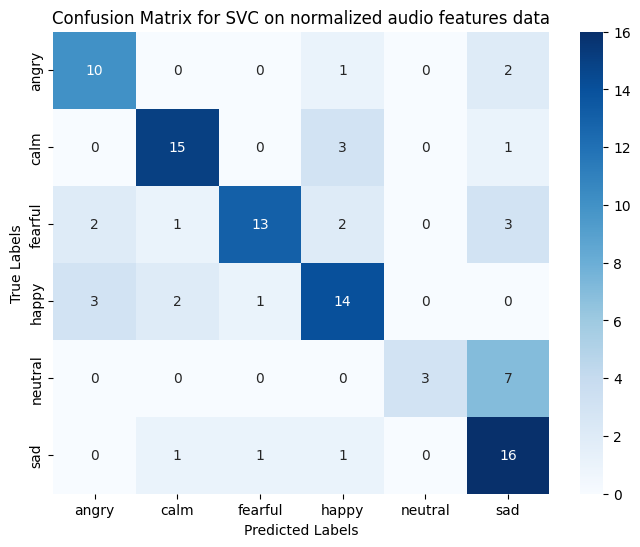



RandomForestClassifier on normalized audio features data
Accuracy: 0.7941176470588235
              precision    recall  f1-score   support

       angry       0.67      0.92      0.77        13
        calm       0.80      0.84      0.82        19
     fearful       0.88      0.67      0.76        21
       happy       0.80      0.80      0.80        20
     neutral       1.00      0.80      0.89        10
         sad       0.75      0.79      0.77        19

    accuracy                           0.79       102
   macro avg       0.82      0.80      0.80       102
weighted avg       0.81      0.79      0.79       102



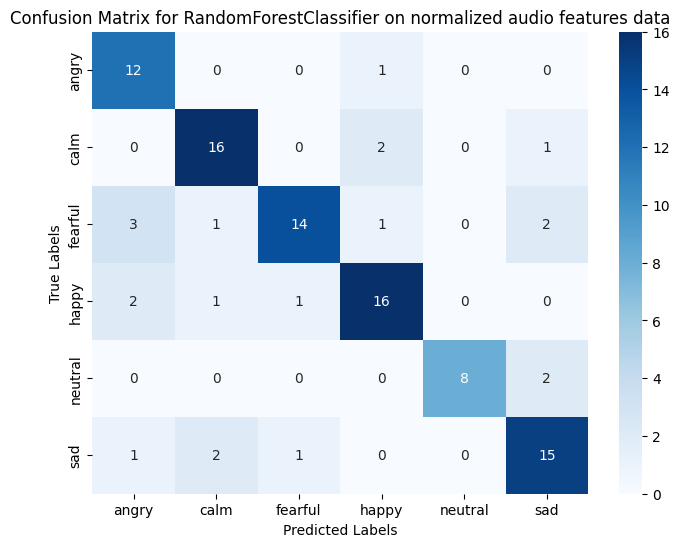

In [28]:

import numpy as np
from scipy.stats import f_oneway
import pandas as pd

# Ensure X_train_normal is converted to a DataFrame if not already
if isinstance(X_train_normal, np.ndarray):
    feature_names = [f"Feature_{i}" for i in range(X_train_normal.shape[1])]  # Assign generic names if not available
    features_df = pd.DataFrame(X_train_normal, columns=feature_names)
elif isinstance(X_train_normal, pd.DataFrame):
    features_df = X_train_normal
else:
    raise TypeError("X_train_normal must be either a NumPy array or a DataFrame")

# Perform ANOVA on a selected feature (e.g., the first feature)
def perform_anova(feature_column, labels, feature_name):
    df = pd.DataFrame({"Feature": feature_column, "Emotion": labels})
    groups = [group["Feature"].values for _, group in df.groupby("Emotion")]
    
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA results for {feature_name}: F-statistic = {f_stat:.3f}, p-value = {p_val:.3e}")
    
    if p_val < 0.05:
        print(f"The differences in {feature_name} across emotion classes are statistically significant.")
    else:
        print(f"No statistically significant differences found in {feature_name} across emotion classes.")
    print("\n" + "="*50 + "\n")

# Example: Perform ANOVA for the first feature
emotion_labels = label_encoder.inverse_transform(y_train_normal)
perform_anova(features_df.iloc[:, 0], emotion_labels, features_df.columns[0])



from scipy.stats import ttest_rel

# Paired t-test between SVM and Random Forest cross-validation accuracies
t_stat, p_val = ttest_rel(rf_cv_scores, svm_cv_scores)
print(f"Paired t-test results: t-statistic = {t_stat:.3f}, p-value = {p_val:.3e}")

# Interpretation
if p_val < 0.05:
    print("The performance difference between Random Forest and SVM is statistically significant.")
else:
    print("No statistically significant difference found between Random Forest and SVM.")


# Define a function to train, evaluate models, and display confusion matrix
def train_evaluate_and_plot_cm(model, X_train, X_test, y_train, y_test, dataset_type):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} on {dataset_type} data")
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model.__class__.__name__} on {dataset_type} data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    print("\n" + "="*50 + "\n")

# Train, evaluate, and plot confusion matrix for each model on normalized audio features
print("Results for normalized audio features data:\n")
for model in [svm_model, rf_model]:
    train_evaluate_and_plot_cm(model, X_train_normal, X_test_normal, y_train_normal, y_test_normal, "normalized audio features")
